<a href="https://colab.research.google.com/github/rifaiershad/TugasDataMining/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/susanli2016/Machine-Learning-with-Python

fatal: destination path 'Machine-Learning-with-Python' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

fruits =pd.read_table("//content/Machine-Learning-with-Python/fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
fruits.shape

(59, 7)

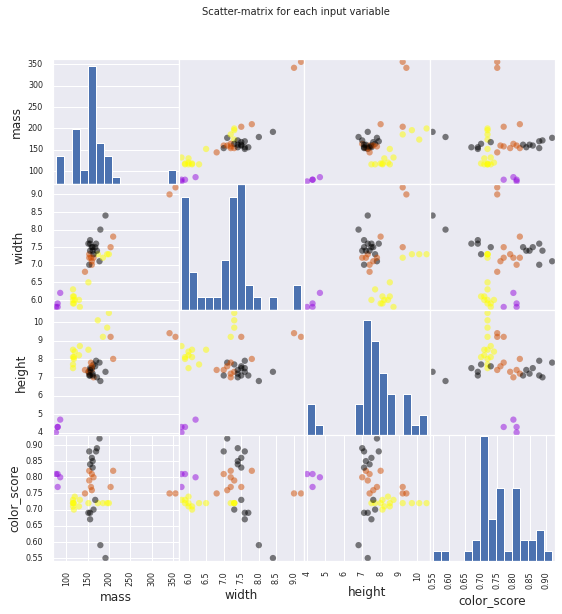

In [ ]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')
plt.show()

In [ ]:
fruits.sample(7)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
50,4,lemon,unknown,130,6.0,8.2,0.71
23,1,apple,cripps_pink,170,7.6,7.9,0.88
20,1,apple,cripps_pink,160,7.5,7.5,0.86
33,3,orange,turkey_navel,190,7.5,8.1,0.74
53,4,lemon,unknown,120,6.0,8.4,0.74
58,4,lemon,unknown,118,6.1,8.1,0.70


In [ ]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [ ]:
set(fruits['fruit_name'].values)

{'apple', 'lemon', 'mandarin', 'orange'}

In [ ]:
fruits_bin = fruits[fruits["fruit_name"].isin(['apple','lemon','mandarin','orange']) ]
set(fruits_bin['fruit_name'].values)

{'apple', 'lemon', 'mandarin', 'orange'}

In [ ]:
fruits_bin.sample(7)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
8,1,apple,braeburn,178,7.1,7.8,0.92
57,4,lemon,unknown,152,6.5,8.5,0.72
49,4,lemon,unknown,132,5.8,8.7,0.73
21,1,apple,cripps_pink,156,7.4,7.4,0.84
3,2,mandarin,mandarin,86,6.2,4.7,0.80
56,4,lemon,unknown,116,5.9,8.1,0.73
14,1,apple,golden_delicious,152,7.6,7.3,0.69


### Pisah antara training dan test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fruits_bin[['mass', 'width','height','color_score']], 
                                                    fruits_bin['fruit_name'], test_size=0.5)
print(X_train.shape, X_test.shape)

(29, 4) (30, 4)


### Pemodelan regresi logistik

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings                 #tidak usah pakai kode ini bila tidak ada warning
warnings.simplefilter("ignore") #tidak usah pakai kode ini bila tidak ada warning

clf = LogisticRegression().fit(X_train, y_train)

In [ ]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediksi ke data test

In [ ]:
y_reglog = clf.predict(X_test)
y_reglog

array(['apple', 'orange', 'apple', 'apple', 'apple', 'lemon', 'apple',
       'lemon', 'apple', 'mandarin', 'orange', 'apple', 'apple', 'apple',
       'lemon', 'lemon', 'orange', 'orange', 'mandarin', 'orange',
       'apple', 'apple', 'apple', 'apple', 'apple', 'orange', 'lemon',
       'lemon', 'apple', 'apple'], dtype=object)

### Akurasi/Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_reglog)

0.6666666666666666

In [ ]:
from sklearn.model_selection import cross_val_score
import time

mulai = time.time()
scores_regLog = cross_val_score(clf, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.78 (+/- 0.30), Waktu = 0.303 detik


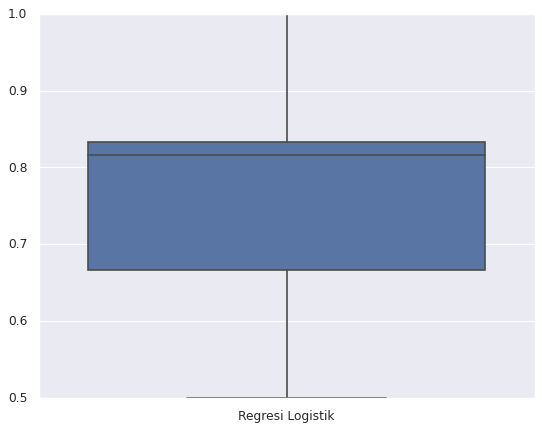

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set()

fruits = pd.DataFrame({'Regresi Logistik':scores_regLog})
sns.boxplot(data=fruits)
plt.show()

In [ ]:
#CELL INI MASIH DEBUGGING
fruits =pd.read_table("//content/Machine-Learning-with-Python/fruit_data_with_colors.txt")
X, y = fruits(return_X_y=True)
set(y)

TypeError: ignored

In [ ]:
X.shape

(59, 4)

In [ ]:
clf = LogisticRegression(multi_class='ovr').fit(X, y)
clf.coef_

array([[-2.15789224e-02,  2.20185663e+00, -3.40936154e-01,
         3.83759792e-01],
       [-3.66628537e-01,  4.19607088e-04, -3.86031559e-02,
         8.86989338e-04],
       [ 2.44020428e-02,  1.62342617e-01, -3.45308858e-01,
         1.62006653e-01],
       [-5.36119913e-02, -1.21731529e+00,  2.58916203e+00,
        -1.40957063e-01]])

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report 
#tidak usah pakai sklearn.metrics bila sudah terdefinisi

gnb = GaussianNB()
nbc = gnb.fit(X_train, y_train)
nbc_prediction = nbc.predict(X_test)

print('Akurasi = ', accuracy_score(y_test, nbc_prediction))
print(confusion_matrix(y_test, nbc_prediction))
print(classification_report(y_test, nbc_prediction))
# Hati-hati Sparse ==> Dense bisa memenuhi memory untuk data relatif cukup besar
# Akurasi baik

Akurasi =  0.7666666666666667
[[10  0  0  0]
 [ 0  6  0  0]
 [ 0  0  2  0]
 [ 6  1  0  5]]
              precision    recall  f1-score   support

       apple       0.62      1.00      0.77        10
       lemon       0.86      1.00      0.92         6
    mandarin       1.00      1.00      1.00         2
      orange       1.00      0.42      0.59        12

    accuracy                           0.77        30
   macro avg       0.87      0.85      0.82        30
weighted avg       0.85      0.77      0.74        30



### k-NN


In [ ]:
from sklearn import neighbors

n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train, y_train)
print('Done!')

Done!


In [ ]:
# Prediksi dengan k-NN
y_kNN = kNN.predict(X_test)
y_kNN[-10:]

array(['apple', 'apple', 'apple', 'lemon', 'orange', 'orange', 'apple',
       'lemon', 'lemon', 'apple'], dtype=object)

In [ ]:
accuracy_score(y_test, y_kNN)

0.6666666666666666

In [ ]:
# Cross Validasi
del kNN
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

mulai = time.time()
scores_kNN = cross_val_score(kNN, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy kNN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

Accuracy kNN: 0.70 (+/- 0.29), Waktu = 0.042 detik


### Membandingkan model

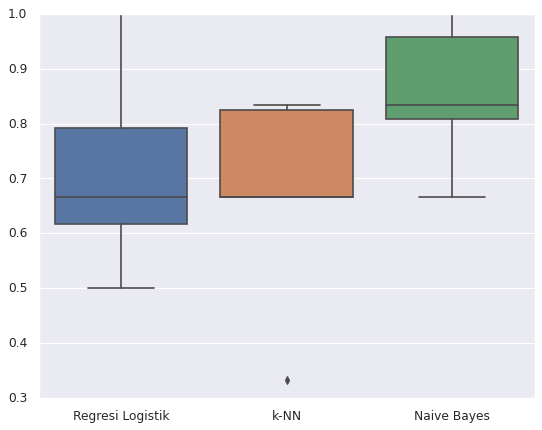

In [ ]:
# Model Comparisons using Cross Validation
fruits =pd.read_table("//content/Machine-Learning-with-Python/fruit_data_with_colors.txt")
X = fruits[['mass','width','height','color_score']]
Y = fruits['fruit_name']

Models = [('Regresi Logistik',clf), ('k-NN',kNN), ('Naive Bayes',gnb)]
Scores = {}
for model_name, model in Models:
    if model_name=='Naive Bayes':
        Scores[model_name] = cross_val_score(model, X.values, Y, cv=10,scoring='accuracy')
    else:
        Scores[model_name] = cross_val_score(model, X, Y, cv=10,scoring='accuracy')
        
dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)